# Safari Dataset Viewer

HuggingFace Hub에 업로드된 데이터셋을 로드하여 확인합니다.

In [2]:
import json
import pandas as pd
from IPython.display import display, HTML
from datasets import load_dataset

REPO_ID = "adwel94/vision-safari-dataset-v2"

ds = load_dataset(REPO_ID, split="train")
print(f"Total: {len(ds)} rows")
print(f"Columns: {ds.column_names}")
print(f"Episodes: {len(set(ds['episode_id']))}")

Total: 228 rows
Columns: ['episode_id', 'mission', 'turn', 'system_prompt', 'context_text', 'image', 'tool_calls', 'tool_results', 'thought_text', 'has_raw']
Episodes: 6


## 전체 요약

In [3]:
def parse_json_field(val):
    if isinstance(val, str):
        return json.loads(val)
    return val if val else []

rows = []
for r in ds:
    tc = parse_json_field(r.get("tool_calls"))
    tr = parse_json_field(r.get("tool_results"))
    rows.append({
        "episode_id": r["episode_id"],
        "mission": r["mission"][:40] + "..." if len(r["mission"]) > 40 else r["mission"],
        "turn": r["turn"],
        "context_preview": r["context_text"][:60] + "...",
        "has_image": r.get("image") is not None,
        "tool_calls": ", ".join(c["name"] for c in tc),
        "tool_results_count": len(tr),
        "has_thought": bool(r.get("thought_text")),
    })

df = pd.DataFrame(rows)
print(f"Shape: {df.shape}")
display(df)

Shape: (228, 8)


,episode_id,mission,turn,context_preview,has_image,tool_calls,tool_results_count,has_thought
0,31195306,빨간색 배경 호랑이를 먼저 잡고 그 후에 주황색 배경 호랑이를 잡아,0,Mission: 빨간색 배경 호랑이를 먼저 잡고 그 후에 주황색 배경 호랑이를 잡아...,True,"update_notepad, move",2,True
1,31195306,빨간색 배경 호랑이를 먼저 잡고 그 후에 주황색 배경 호랑이를 잡아,1,Mission: 빨간색 배경 호랑이를 먼저 잡고 그 후에 주황색 배경 호랑이를 잡아...,True,"move, catch, update_notepad, declare_found",4,True
2,31195306,빨간색 배경 호랑이를 먼저 잡고 그 후에 주황색 배경 호랑이를 잡아,2,Mission: 빨간색 배경 호랑이를 먼저 잡고 그 후에 주황색 배경 호랑이를 잡아...,True,"update_notepad, move",2,True
3,31195306,빨간색 배경 호랑이를 먼저 잡고 그 후에 주황색 배경 호랑이를 잡아,3,Mission: 빨간색 배경 호랑이를 먼저 잡고 그 후에 주황색 배경 호랑이를 잡아...,True,"update_notepad, move",2,True
4,31195306,빨간색 배경 호랑이를 먼저 잡고 그 후에 주황색 배경 호랑이를 잡아,4,Mission: 빨간색 배경 호랑이를 먼저 잡고 그 후에 주황색 배경 호랑이를 잡아...,True,"move, catch, update_notepad, declare_found, de...",5,True
...,...,...,...,...,...,...,...,...
223,71b89f3a,파란색 돼지 아이콘을 잡아줘,19,Mission: 파란색 돼지 아이콘을 잡아줘\nStep: 20/180\nPositi...,True,"update_notepad, move",2,True
224,71b89f3a,파란색 돼지 아이콘을 잡아줘,20,Mission: 파란색 돼지 아이콘을 잡아줘\nStep: 21/180\nPositi...,True,"move, update_notepad",2,True
225,71b89f3a,파란색 돼지 아이콘을 잡아줘,21,Mission: 파란색 돼지 아이콘을 잡아줘\nStep: 22/180\nPositi...,True,"move, update_notepad",2,True
226,71b89f3a,파란색 돼지 아이콘을 잡아줘,22,Mission: 파란색 돼지 아이콘을 잡아줘\nStep: 23/180\nPositi...,True,"update_notepad, move",2,True


## 에피소드별 요약

In [ ]:
episode_summary = df.groupby("episode_id").agg(
    mission=("mission", "first"),
    turns=("turn", "count"),
    max_turn=("turn", "max"),
    images_ok=("has_image", "sum"),
    has_thought=("has_thought", "sum"),
).reset_index()
display(episode_summary)

## 개별 턴 상세 확인

`IDX`를 변경하여 원하는 턴을 확인할 수 있습니다.

In [ ]:
IDX = 0  # 확인할 인덱스

r = ds[IDX]
tc = parse_json_field(r.get("tool_calls"))
tr = parse_json_field(r.get("tool_results"))

print(f"Episode: {r['episode_id']}")
print(f"Mission: {r['mission']}")
print(f"Turn: {r['turn']}")

print(f"\n--- Context Text ---")
print(r["context_text"])

print(f"\n--- Thought ---")
print(r.get("thought_text") or "(none)")

print(f"\n--- Tool Calls ({len(tc)}) ---")
for c in tc:
    print(f"  {c['name']}({json.dumps(c['args'], ensure_ascii=False)[:120]})")

print(f"\n--- Tool Results ({len(tr)}) ---")
for t in tr:
    print(f"  {t['name']} -> {json.dumps(t['result'], ensure_ascii=False)[:120]}")

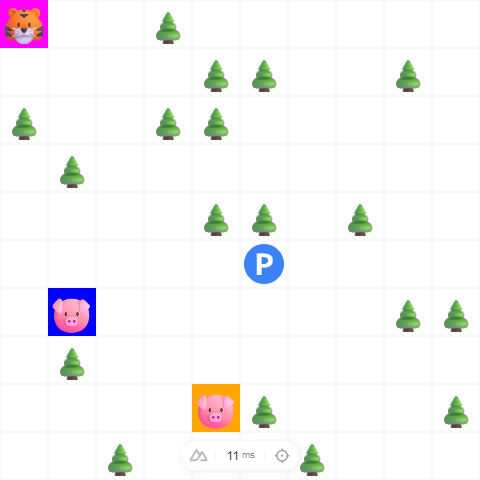

In [4]:
# 이미지 확인
img = r.get("image")
if img is not None:
    display(img)
else:
    print("(no image)")

## 에피소드 단위 탐색

특정 에피소드의 전체 턴을 순서대로 확인합니다.

In [ ]:
TARGET_EPISODE = ds[0]["episode_id"]  # 원하는 episode_id로 변경

episode_rows = [r for r in ds if r["episode_id"] == TARGET_EPISODE]
episode_rows.sort(key=lambda x: x["turn"])

print(f"Episode: {TARGET_EPISODE}")
print(f"Mission: {episode_rows[0]['mission']}")
print(f"Turns: {len(episode_rows)}")
print("=" * 60)

for r in episode_rows:
    tc = parse_json_field(r.get("tool_calls"))
    tr = parse_json_field(r.get("tool_results"))

    print(f"\n--- Turn {r['turn']} ---")
    if r.get("image") is not None:
        display(r["image"])
    print(r["context_text"][:200])
    print(f"\nThought: {(r.get('thought_text') or '(none)')[:200]}")
    print(f"Tool calls: {', '.join(c['name'] for c in tc)}")
    for t in tr:
        print(f"  {t['name']} -> {json.dumps(t['result'], ensure_ascii=False)[:100]}")

## Tool 사용 통계

In [ ]:
from collections import Counter

tool_counter = Counter()
for r in ds:
    tc = parse_json_field(r.get("tool_calls"))
    for c in tc:
        tool_counter[c["name"]] += 1

tool_df = pd.DataFrame(
    tool_counter.most_common(),
    columns=["tool", "count"],
)
display(tool_df)
tool_df.plot.bar(x="tool", y="count", title="Tool Call Frequency", legend=False)